# Exploratory Data Analysis

In this notebook, we will see some tools for doing exploratory data analysis (EDA) on a dataset. 

We'll be using the [Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/articles/intro.html) dataset, which contains size measurements for three penguin species observed on three islands in the Palmer Archipelago of Antarctica.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
penguins = pd.read_csv('../data/penguins.csv')

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## Categorical Variables

**Warm-up Question:** How many penguins are there of each sex?

In [4]:
# Your code here

Notice also that we can normalize our value counts. For example, to get the percentage by species, we can use this: 

In [5]:
penguins['sex'].value_counts(normalize = True)

male      0.504505
female    0.495495
Name: sex, dtype: float64

If we want to create a plot showing the number of penguins per species, we can do so using the `.plot` method. We need to specify that we want to create a bar chart.

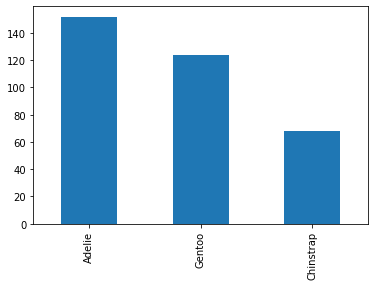

In [6]:
penguins['species'].value_counts().plot(kind = 'bar');

The default plot can be improved using a combination of arguments and matplotlib methods.

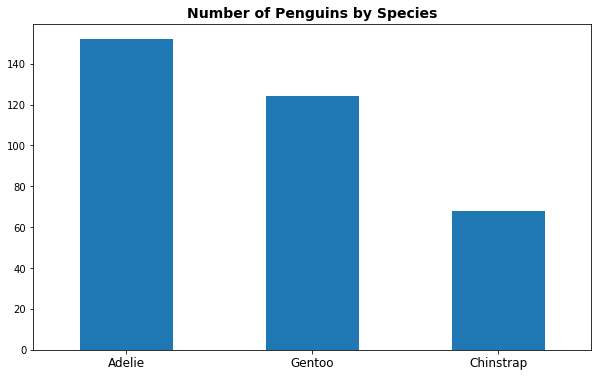

In [7]:
penguins['species'].value_counts().plot(kind = 'bar',
                                        figsize = (10,6))               # Increase the plot size                

plt.xticks(rotation = 0,                                                # Remove the rotation of the labels
           fontsize = 12)                   
plt.title('Number of Penguins by Species',                              # Add a title
         fontsize = 14,
         fontweight = 'bold');

## Numeric Variables

Now, let's say that we want to study the `body_mass_g` variable.

We can quickly get a quick summary by using the `.describe()` method.

In [8]:
penguins['body_mass_g'].describe()

count     342.000000
mean     4201.754386
std       801.954536
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4750.000000
max      6300.000000
Name: body_mass_g, dtype: float64

We can also calculate individual summary statistics, many of which have built-in _pandas_ methods.

In [9]:
penguins['body_mass_g'].mean()

4201.754385964912

In [10]:
penguins['body_mass_g'].median()

4050.0

We have a number of options for inspecting the distribution of a numeric variable. In this notebook, we'll look at histograms and box plots.

For histograms, we can use the `.hist()` method from _pandas_.

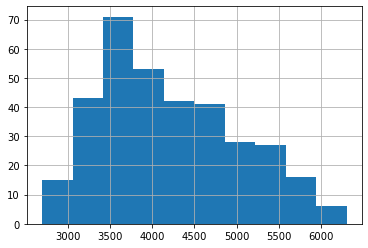

In [11]:
penguins['body_mass_g'].hist();

As before, we can easily make modifications to this plot.

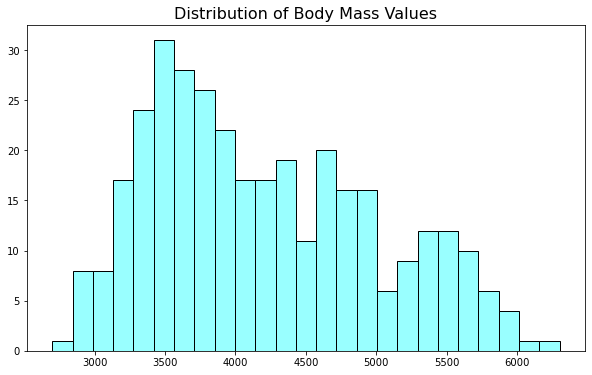

In [21]:
penguins['body_mass_g'].hist(bins = 25,
                            color = '#99FFFF',
                            edgecolor = 'black',
                            figsize = (10,6),
                            grid = False)


plt.title('Distribution of Body Mass Values', fontsize = 16);

## Categorical-Numeric Combinations

The histogram of body mass values is not exactly symmetric and appears to have a number of subgroups. Perhaps this distribution shape could be explained by looking at the body mass distribution by species. Let's say we want to look at the average body mass by species.

One way to do this is to use `.groupby`.

Quite often when using `.groupby()`, our goal is to calculate an aggregate value by group. To use `.groupby()`, we need to tell pandas: 
* **what** to group by
* **which** column (or columns) we want to aggregate
* **how** to aggregate

In this case, we want to group by `species` and then aggregate the `body_mass_g` column by taking the _mean_.

In [13]:
penguins.groupby('species')['body_mass_g'].mean()

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

You can even use `.describe` with `groupby` to get even more information by species.

In [14]:
penguins.groupby('species')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,151.0,3700.662252,458.566126,2850.0,3350.0,3700.0,4000.0,4775.0
Chinstrap,68.0,3733.088235,384.335081,2700.0,3487.5,3700.0,3950.0,4800.0
Gentoo,123.0,5076.016260,504.116237,3950.0,4700.0,5000.0,5500.0,6300.0


**Question:** Looking at the summary statistics by group, what do you notice?

## Comparing Two Numeric Variables

Let's investigate the relationship between bill length and bill depth. We can do this using a scatterplot.

First, let's use the `.plot` method from pandas.

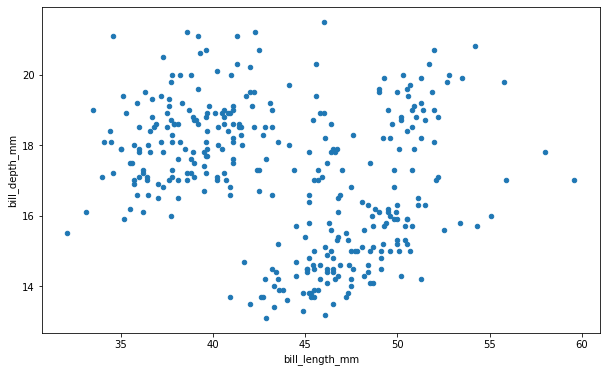

In [15]:
penguins.plot(kind = 'scatter',
             x = 'bill_length_mm',
             y = 'bill_depth_mm',
             figsize = (10,6));

We do need to remember that we have multiple species of penguins. To get a better understanding of the relationship between these variables, we could color the points by species. The easiest way to do this is using the _seaborn_ library.

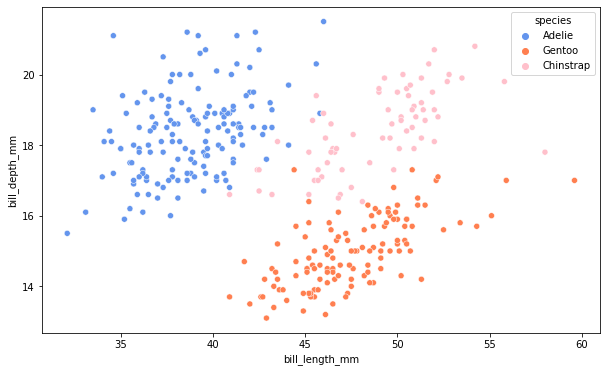

In [16]:
plt.figure(figsize = (10,6))

sns.scatterplot(data = penguins,
               x = 'bill_length_mm',
               y = 'bill_depth_mm',
               hue = 'species',
               palette = ['cornflowerblue', 'coral', 'pink']);